Para esta practiva vamos a utilizar el dataset disponible en Kaggle de la competencia para clasificar perros y gatos, disponible en el siguiente enlace: https://www.kaggle.com/c/dogs-vs-cats/data.

Este conjunto de datos contiene 25 imagenes de perros y gatos para ser utilizadas durante el entrenamiento del modelo, y 15 imagenes para test.

Descargar las imagenes y ubicarlas en dos carpetas, entrenamiento y prueba respectivamente.

In [1]:
!pip install opencv-python

import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

!pip install np_utils

from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

from sklearn.utils import shuffle

import sklearn
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


Definimos las siguiente variables:

In [2]:
ENTRENAMIENTO_DIR = 'data/entrenamiento/'
TEST_DIR = 'data/pruebas/'

#definimos el shape de las imagenes
ROWS = 64
COLS = 64
CHANNELS = 3

La siguiente instruccion permite llenar la lista con las rutas relativas de las imagenes para su posterior manipulacion, se utiliza list comprehension python, una forma pythonista de hacerlo, otra forma es por medio de un range, la funcion os.listdir retorna los archivos disponibles en la carpeta.

In [3]:
train_images = [ENTRENAMIENTO_DIR+i for i in os.listdir(ENTRENAMIENTO_DIR)]
test_images = [TEST_DIR+i for i in os.listdir(TEST_DIR)]

In [4]:
train_images

['data/entrenamiento/cat.0.jpg',
 'data/entrenamiento/cat.1.jpg',
 'data/entrenamiento/cat.10.jpg',
 'data/entrenamiento/cat.100.jpg',
 'data/entrenamiento/cat.1000.jpg',
 'data/entrenamiento/cat.10000.jpg',
 'data/entrenamiento/cat.10001.jpg',
 'data/entrenamiento/cat.10002.jpg',
 'data/entrenamiento/cat.10003.jpg',
 'data/entrenamiento/cat.10004.jpg',
 'data/entrenamiento/cat.10005.jpg',
 'data/entrenamiento/cat.10006.jpg',
 'data/entrenamiento/cat.10007.jpg',
 'data/entrenamiento/cat.10008.jpg',
 'data/entrenamiento/cat.10009.jpg',
 'data/entrenamiento/cat.1001.jpg',
 'data/entrenamiento/cat.10010.jpg',
 'data/entrenamiento/cat.10011.jpg',
 'data/entrenamiento/cat.10012.jpg',
 'data/entrenamiento/cat.10013.jpg',
 'data/entrenamiento/cat.10014.jpg',
 'data/entrenamiento/cat.10015.jpg',
 'data/entrenamiento/cat.10016.jpg',
 'data/entrenamiento/cat.10017.jpg',
 'data/entrenamiento/cat.10018.jpg',
 'data/entrenamiento/cat.10019.jpg',
 'data/entrenamiento/cat.1002.jpg',
 'data/entrenamie

La siguiente instruccion permite leer una imagen pasandole una ruta especifica:

In [5]:
def read_image(file_path):
  #print(file_path)
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  #print(img)
  return cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)

La siguiente funcion toma una lista de rutas de imagenes, para convertirla en el formato requerido por una CNN.

In [7]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  
  X = np.ndarray((m,ROWS,COLS,CHANNELS), dtype=np.uint8)
  y = np.zeros((m,1))
  print("X.shape is {}".format(X.shape))
  
  for i,image_file in enumerate(images) :
    image = read_image(image_file)
    X[i,:] = np.squeeze(image.reshape((ROWS, COLS, CHANNELS)))
    if 'dog' in image_file.lower() :
      y[i,0] = 1
    elif 'cat' in image_file.lower() :
      y[i,0] = 0
    else : # for test data
      y[i,0] = image_file.split('/')[-1].split('.')[0]
      
    if i%5000 == 0 :
      print("Proceed {} of {}".format(i, m))
    
  return X,y

Hacemos un llamado a la funcion prep_data, para obtener los datos requeridos para entrenar y evaluar la CNN.

In [8]:
X_train, y_train = prep_data(train_images)
X_test, test_idx = prep_data(test_images)

X.shape is (25000, 64, 64, 3)
Proceed 0 of 25000
Proceed 5000 of 25000
Proceed 10000 of 25000
Proceed 15000 of 25000
Proceed 20000 of 25000
X.shape is (12500, 64, 64, 3)
Proceed 0 of 12500
Proceed 5000 of 12500
Proceed 10000 of 12500


In [9]:
print("Train shape: {}".format(X_train.shape))
print("Test shape: {}".format(X_test.shape))

Train shape: (25000, 64, 64, 3)
Test shape: (12500, 64, 64, 3)


In [11]:
y_train[0]

array([0.])

La siguiente instruccion permite barajar o combinar los datos:

In [12]:
X, y = shuffle(X_train, y_train)

Definimos la clase 1 para denotar perro, 0 para denotar gato.

In [16]:
classes = {0: 'cats',
           1: 'dogs'}

Subdivimos los datos para entrenamiento y para prueba un 20%.

In [13]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1)

print("Train shape: {}".format(X_train.shape))
print("Train label shape: {}".format(y_train.shape))
print("Validation shape: {}".format(X_val.shape))
print("Validation label shape: {}".format(y_val.shape))

Train shape: (20000, 64, 64, 3)
Train label shape: (20000, 1)
Validation shape: (5000, 64, 64, 3)
Validation label shape: (5000, 1)


Luego convertimos las etiquetas de los conjuntos de datos en una representacion de vector, mediante one-hot-encoding

In [14]:
y_train_one_hot = to_categorical(y_train)
print(y_train_one_hot.shape)

num_classes = y_train_one_hot.shape[1]
print(num_classes)

y_val_one_hot = to_categorical(y_val)
print(y_val_one_hot.shape)

(20000, 2)
2
(5000, 2)


In [15]:
y_train_one_hot[1000]

array([1., 0.], dtype=float32)

Normalizamos los datos.

In [16]:
X_train_norm = X_train / 255
X_val_norm = X_val / 255

In [17]:
X_train_norm[0]

array([[[0.53333333, 0.67843137, 0.75686275],
        [0.54117647, 0.68627451, 0.76470588],
        [0.56078431, 0.70588235, 0.78431373],
        ...,
        [0.15294118, 0.14901961, 0.21176471],
        [0.13333333, 0.12941176, 0.19215686],
        [0.1254902 , 0.12156863, 0.18431373]],

       [[0.5372549 , 0.68235294, 0.76078431],
        [0.54509804, 0.69019608, 0.76862745],
        [0.56862745, 0.71372549, 0.79215686],
        ...,
        [0.15294118, 0.14901961, 0.20784314],
        [0.13333333, 0.12941176, 0.19215686],
        [0.12156863, 0.11764706, 0.18039216]],

       [[0.54117647, 0.68627451, 0.76470588],
        [0.54901961, 0.69411765, 0.77254902],
        [0.57254902, 0.71764706, 0.79607843],
        ...,
        [0.14901961, 0.14509804, 0.20392157],
        [0.13333333, 0.12941176, 0.19215686],
        [0.1254902 , 0.12156863, 0.18431373]],

       ...,

       [[0.70196078, 0.71764706, 0.69411765],
        [0.7372549 , 0.74509804, 0.74117647],
        [0.71372549, 0

Implementar la CNN.

In [37]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(ROWS, COLS, CHANNELS), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, (1,1), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dropout(0.4))

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 128)         0         
__________

In [38]:
model.fit(X_train_norm, y_train_one_hot, validation_data=(X_val_norm, y_val_one_hot), epochs=5, batch_size = 64)

Train on 20000 samples, validate on 5000 samples
Epoch 1/5
20000/20000 [==============================] - 132s 7ms/step - loss: 0.6785 - acc: 0.5631 - val_loss: 0.6316 - val_acc: 0.6542
Epoch 2/5
20000/20000 [==============================] - 129s 6ms/step - loss: 0.6022 - acc: 0.6771 - val_loss: 0.5443 - val_acc: 0.7408
Epoch 3/5
20000/20000 [==============================] - 140s 7ms/step - loss: 0.5411 - acc: 0.7279 - val_loss: 0.4947 - val_acc: 0.7608
Epoch 4/5
20000/20000 [==============================] - 131s 7ms/step - loss: 0.4891 - acc: 0.7632 - val_loss: 0.4579 - val_acc: 0.7928
Epoch 5/5
20000/20000 [==============================] - 131s 7ms/step - loss: 0.4512 - acc: 0.7919 - val_loss: 0.4169 - val_acc: 0.8104


In [39]:
score = model.evaluate(X_val_norm, y_val_one_hot, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4168608283042908
Test accuracy: 0.8104


Verificar algunas predicciones del modelo

In [41]:
def show_images(X, y, idx) :
  image = X[idx]
  #image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image)
  plt.title("This is a {}".format(classes[y[idx,0]]))
  plt.show()

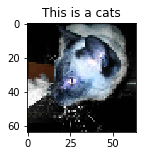

Our Model Prediction: [0]


In [42]:
image = X_train[0]
test_pred = model.predict_classes(image.reshape(1, 64, 64, 3))

show_images(X_train, y_train,0)

print("La prediccion del modelo es: {}".format(test_pred))